# Assignment 2: Airbnb Price Prediction

## Introduction

This notebook analyzes Airbnb San Diego listings data to build machine learning models for price prediction. We'll explore various features that influence listing prices, including:

- Property characteristics (bedrooms, bathrooms, accommodates)
- Location (latitude, longitude)
- Room type
- Reviews and ratings
- Amenities
- Availability

Our goal is to:
1. Load and explore the Airbnb listings dataset
2. Preprocess and clean the data
3. Perform exploratory data analysis
4. Build and evaluate predictive models for listing prices



In [13]:
import sys
from pathlib import Path
import os

# Add project root to Python path
# This works whether Jupyter is started from project root or notebooks directory
current_dir = Path().resolve()
# If we're in notebooks/, go up one level; otherwise assume we're already at project root
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
else:
    project_root = current_dir

sys.path.insert(0, str(project_root))
os.chdir(project_root)  # Change to project root for relative paths

from scripts.load_data import load_data
from scripts.preprocess import preprocess
from scripts.eda import run_eda
from scripts.models import train_models

df_raw = load_data()
df = preprocess(df_raw)

print("Cleaned dataset shape:", df.shape)
display(df.head())


Loading data from /Users/katiehannigan/Downloads/old computer/FA25/cse158r/assignment2/data/listings.csv...
Original dataset shape: (13162, 79)
Original columns: 79
Cleaning price column...
Price range: $11.00 - $50040.00

Selected dataset shape: (13162, 11)
Selected columns: ['price', 'bedrooms', 'bathrooms', 'accommodates', 'room_type', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'latitude', 'longitude', 'amenities']
Starting preprocessing...

Handling missing values...
Numerical columns to impute: ['bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'latitude', 'longitude']
  bedrooms: 279 missing values (2.1%)
    Filled with median: 2.00
  bathrooms: 1749 missing values (13.3%)
    Filled with median: 1.00
  review_scores_rating: 2200 missing values (16.7%)
    Filled with median: 4.89

Processing amenities column...
Amenities count range: 0 - 107

Encoding categorical features...
Room types: {'Entire home/

,price,bedrooms,bathrooms,accommodates,number_of_reviews,review_scores_rating,availability_365,latitude,longitude,amenities_count,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,211.0,3.0,2.0,7,202,4.84,331,32.755220,-117.128730,73,False,False,False
1,82.0,1.0,1.0,2,7,4.86,304,32.805330,-117.234000,25,False,True,False
2,184.0,2.0,2.0,6,129,4.76,331,32.807510,-117.257600,21,False,False,False
3,88.0,1.0,1.0,2,987,4.79,223,32.805830,-117.242440,33,False,True,False
4,105.0,0.0,1.0,2,1203,4.87,182,32.806553,-117.234808,43,False,False,False


## Load Dataset

The data has been loaded from `listings.csv` in the `/data` directory. The dataset contains Airbnb San Diego listings with various features including property characteristics, location, reviews, and amenities.


## Preview + Summary Statistics

Let's examine the dataset structure and get summary statistics:


In [14]:
print(f"Total records: {len(df)}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nData types:")
print(df.dtypes)
print(f"\nSummary statistics:")
print(df.describe())
print(f"\nMissing values:")
print(df.isnull().sum())


Total records: 11381

Dataset shape: (11381, 13)

Column names:
['price', 'bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'latitude', 'longitude', 'amenities_count', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']

Data types:
price                     float64
bedrooms                  float64
bathrooms                 float64
accommodates                int64
number_of_reviews           int64
review_scores_rating      float64
availability_365            int64
latitude                  float64
longitude                 float64
amenities_count             int64
room_type_Hotel room         bool
room_type_Private room       bool
room_type_Shared room        bool
dtype: object

Summary statistics:
              price      bedrooms     bathrooms  accommodates  \
count  11381.000000  11381.000000  11381.000000  11381.000000   
mean     650.378526      1.959757      1.676083      5.131447   
std     4131.343

## Preprocessing

The data has been preprocessed to:
- Clean price column (remove $, convert to float)
- Handle missing values in numerical columns
- Encode categorical features (room_type)
- Convert amenities string into an integer count feature
- Prepare data for modeling


In [15]:
print("Preprocessed data summary:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print("\nFeature columns:")
print(df.columns.tolist())
print(f"\nPrice statistics:")
print(df['price'].describe())


Preprocessed data summary:
              price      bedrooms     bathrooms  accommodates  \
count  11381.000000  11381.000000  11381.000000  11381.000000   
mean     650.378526      1.959757      1.676083      5.131447   
std     4131.343694      1.497613      1.053934      3.381893   
min       11.000000      0.000000      0.000000      1.000000   
25%      115.000000      1.000000      1.000000      2.000000   
50%      176.000000      2.000000      1.000000      4.000000   
75%      300.000000      3.000000      2.000000      6.000000   
max    50040.000000     57.000000     20.000000     16.000000   

       number_of_reviews  review_scores_rating  availability_365  \
count       11381.000000          11381.000000      11381.000000   
mean           72.875670              4.832879        233.653545   
std           116.837424              0.271498        110.269308   
min             0.000000              1.000000          0.000000   
25%             3.000000              4.800000 

## Exploratory Data Analysis (EDA)

Let's generate visualizations to understand the price distribution and relationships between features:


In [16]:
run_eda(df)


Running Exploratory Data Analysis...
Saved: price_distribution.png
Saved: price_vs_features.png
Saved: correlation_heatmap.png
Saved: geographic_scatter.png
Saved: price_by_room_type.png

Summary Statistics:
Total records: 11381

Price statistics:
count    11381.000000
mean       650.378526
std       4131.343694
min         11.000000
25%        115.000000
50%        176.000000
75%        300.000000
max      50040.000000
Name: price, dtype: float64

Feature statistics:
           bedrooms     bathrooms  accommodates  number_of_reviews  \
count  11381.000000  11381.000000  11381.000000       11381.000000   
mean       1.959757      1.676083      5.131447          72.875670   
std        1.497613      1.053934      3.381893         116.837424   
min        0.000000      0.000000      1.000000           0.000000   
25%        1.000000      1.000000      2.000000           3.000000   
50%        2.000000      1.000000      4.000000          26.000000   
75%        3.000000      2.000000    

### View Generated Figures

The EDA script has generated several visualizations saved to `/output/figures/`:

1. **price_distribution.png** - Price distribution (histogram, box plot, Q-Q plot)
2. **price_vs_features.png** - Price vs bedrooms and bathrooms
3. **correlation_heatmap.png** - Feature correlations
4. **geographic_scatter.png** - Geographic scatterplot (lat, lon colored by price)
5. **price_by_room_type.png** - Boxplot of price by room type


In [17]:
# Display some of the generated figures
from IPython.display import Image, display
from pathlib import Path

figures_dir = Path('../output/figures')

if (figures_dir / 'price_distribution.png').exists():
    display(Image(str(figures_dir / 'price_distribution.png')))
    
if (figures_dir / 'price_vs_features.png').exists():
    display(Image(str(figures_dir / 'price_vs_features.png')))
    
if (figures_dir / 'correlation_heatmap.png').exists():
    display(Image(str(figures_dir / 'correlation_heatmap.png')))
    
if (figures_dir / 'geographic_scatter.png').exists():
    display(Image(str(figures_dir / 'geographic_scatter.png')))
    
if (figures_dir / 'price_by_room_type.png').exists():
    display(Image(str(figures_dir / 'price_by_room_type.png')))


## Feature Engineering

Additional features have been created during preprocessing:

- **Amenities count**: Converted amenities string into an integer count
- **Room type encoding**: One-hot encoded room_type categories
- **Numerical features**: All numerical columns are ready for modeling
- **Missing value imputation**: Missing values in numerical columns filled with median


In [18]:
# Show feature engineering results
print("Engineered features:")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature columns:")
print(df.columns.tolist())

if 'amenities_count' in df.columns:
    print(f"\nAmenities count statistics:")
    print(df['amenities_count'].describe())

room_type_cols = [col for col in df.columns if col.startswith('room_type_')]
if room_type_cols:
    print(f"\nRoom type dummy variables: {room_type_cols}")


Engineered features:
Total features: 13

Feature columns:
['price', 'bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'availability_365', 'latitude', 'longitude', 'amenities_count', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']

Amenities count statistics:
count    11381.000000
mean        44.711976
std         17.023972
min          0.000000
25%         33.000000
50%         46.000000
75%         57.000000
max        107.000000
Name: amenities_count, dtype: float64

Room type dummy variables: ['room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']


## Baseline Model

We'll start with a simple baseline model that predicts the mean price.


In [19]:
# Baseline model will be trained as part of train_models()
# This is just for demonstration
import numpy as np

baseline_pred = np.full(len(df), df['price'].mean())
baseline_rmse = np.sqrt(np.mean((df['price'] - baseline_pred)**2))
baseline_mae = np.mean(np.abs(df['price'] - baseline_pred))

print(f"Baseline Model (Mean Prediction):")
print(f"  RMSE: ${baseline_rmse:.2f}")
print(f"  MAE: ${baseline_mae:.2f}")


Baseline Model (Mean Prediction):
  RMSE: $4131.16
  MAE: $829.04


## Advanced Models

Now we'll train more sophisticated models:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor (if available)


In [20]:
results, models = train_models(df)
results


Preparing features...
Features: 12
Samples: 11381

Splitting data (test_size=0.2)...
Training samples: 9104
Test samples: 2277

Training Baseline Model (Mean)...
RMSE: $3953.91, MAE: $817.21, R²: -0.000

Training Linear Regression...
RMSE: $3194.68, MAE: $783.70, R²: 0.347

Training Random Forest...
RMSE: $1784.82, MAE: $304.50, R²: 0.796

Skipping XGBoost (not installed)

Model Comparison:
            Model        RMSE        MAE        R²
  Baseline (Mean) 3953.913425 817.205079 -0.000018
Linear Regression 3194.681330 783.702249  0.347157
    Random Forest 1784.817397 304.502645  0.796230
Saved model: /Users/katiehannigan/Downloads/old computer/FA25/cse158r/assignment2/output/models/linear_regression.pkl
Saved model: /Users/katiehannigan/Downloads/old computer/FA25/cse158r/assignment2/output/models/random_forest.pkl


,Model,RMSE,MAE,R²
0,Baseline (Mean),3953.913425,817.205079,-0.000018
1,Linear Regression,3194.681330,783.702249,0.347157
2,Random Forest,1784.817397,304.502645,0.796230


## Evaluation + Error Analysis

The models have been evaluated using:
- **RMSE** (Root Mean Squared Error): Lower is better (in dollars)
- **MAE** (Mean Absolute Error): Lower is better (in dollars)
- **R²** (Coefficient of Determination): Higher is better (closer to 1.0)

Let's visualize the results:


### Error Analysis: Residuals and Prediction Errors

Let's analyze where our best model (Random Forest) makes prediction errors:


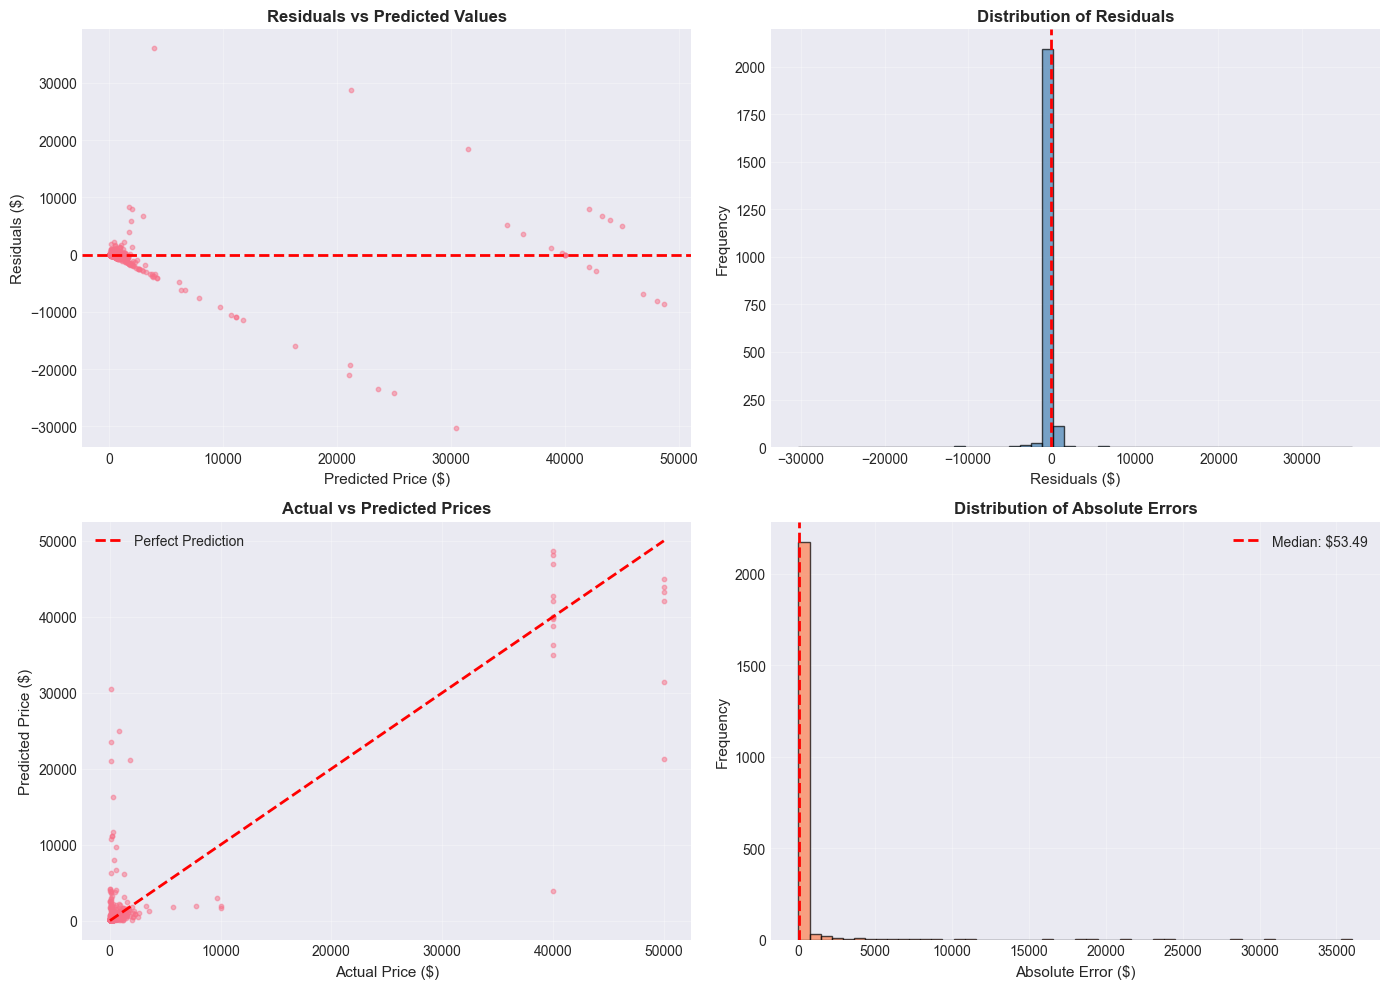

Saved: error_analysis.png

Error Statistics:
  Mean Residual: $-88.38
  Median Absolute Error: $53.49
  Mean Absolute Error: $304.50
  75th Percentile Absolute Error: $109.71
  95th Percentile Absolute Error: $600.31

Top 5 Worst Predictions:
  Actual: $40000.00, Predicted: $3968.54, Error: $36031.46
  Actual: $144.00, Predicted: $30447.27, Error: $30303.27
  Actual: $50000.00, Predicted: $21261.43, Error: $28738.57
  Actual: $808.00, Predicted: $24975.25, Error: $24167.25
  Actual: $114.00, Predicted: $23576.13, Error: $23462.13


<Figure size 640x480 with 0 Axes>

In [22]:
# Error analysis for Random Forest
if 'random_forest' in models:
    from scripts.models import prepare_features
    from sklearn.model_selection import train_test_split
    
    # Prepare data
    X, y = prepare_features(df, target_col='price')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Get predictions
    rf_model = models['random_forest']
    y_pred = rf_model.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Create error analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Residuals vs Predicted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5, s=10)
    axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Predicted Price ($)', fontsize=11)
    axes[0, 0].set_ylabel('Residuals ($)', fontsize=11)
    axes[0, 0].set_title('Residuals vs Predicted Values', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Residuals distribution
    axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Residuals ($)', fontsize=11)
    axes[0, 1].set_ylabel('Frequency', fontsize=11)
    axes[0, 1].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Actual vs Predicted
    axes[1, 0].scatter(y_test, y_pred, alpha=0.5, s=10)
    # Perfect prediction line
    max_val = max(y_test.max(), y_pred.max())
    min_val = min(y_test.min(), y_pred.min())
    axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    axes[1, 0].set_xlabel('Actual Price ($)', fontsize=11)
    axes[1, 0].set_ylabel('Predicted Price ($)', fontsize=11)
    axes[1, 0].set_title('Actual vs Predicted Prices', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Absolute error distribution
    abs_errors = np.abs(residuals)
    axes[1, 1].hist(abs_errors, bins=50, edgecolor='black', alpha=0.7, color='coral')
    axes[1, 1].axvline(x=abs_errors.median(), color='red', linestyle='--', linewidth=2, 
                       label=f'Median: ${abs_errors.median():.2f}')
    axes[1, 1].set_xlabel('Absolute Error ($)', fontsize=11)
    axes[1, 1].set_ylabel('Frequency', fontsize=11)
    axes[1, 1].set_title('Distribution of Absolute Errors', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    from pathlib import Path
    figures_dir = Path('../output/figures')
    figures_dir.mkdir(parents=True, exist_ok=True)
    plt.savefig(figures_dir / 'error_analysis.png', dpi=300, bbox_inches='tight')
    print(f"Saved: error_analysis.png")
    
    # Print error statistics
    print("\nError Statistics:")
    print(f"  Mean Residual: ${residuals.mean():.2f}")
    print(f"  Median Absolute Error: ${abs_errors.median():.2f}")
    print(f"  Mean Absolute Error: ${abs_errors.mean():.2f}")
    print(f"  75th Percentile Absolute Error: ${abs_errors.quantile(0.75):.2f}")
    print(f"  95th Percentile Absolute Error: ${abs_errors.quantile(0.95):.2f}")
    
    # Analyze worst predictions
    worst_indices = abs_errors.nlargest(5).index
    print("\nTop 5 Worst Predictions:")
    for idx in worst_indices:
        # idx is the actual index label from y_test
        actual_val = y_test.loc[idx]
        # Get positional index for y_pred (numpy array)
        pos_idx = y_test.index.get_loc(idx)
        pred_val = y_pred[pos_idx]
        error_val = abs_errors.loc[idx]
        print(f"  Actual: ${actual_val:.2f}, Predicted: ${pred_val:.2f}, Error: ${error_val:.2f}")


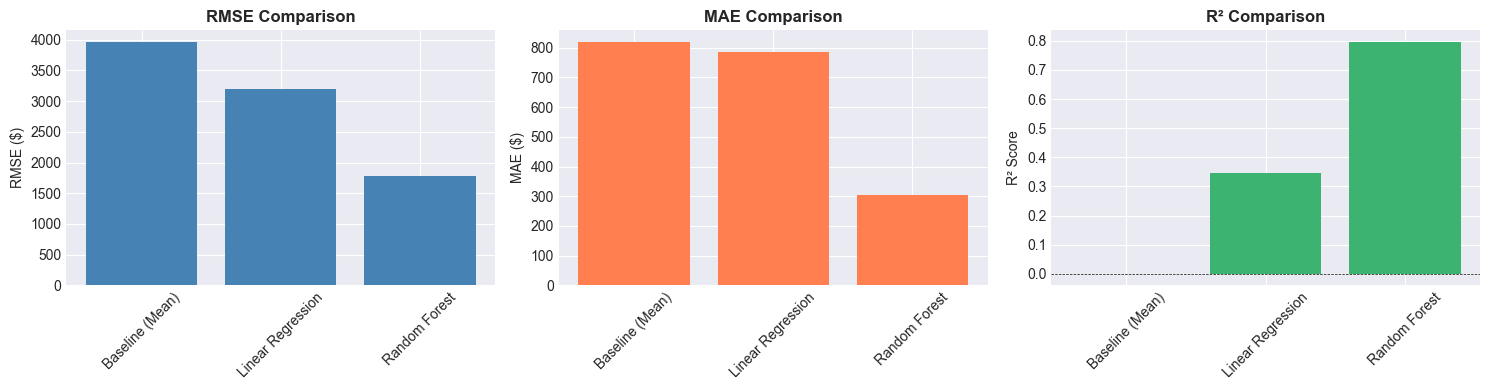


Best model by metric:
  Best RMSE: Random Forest ($1784.82)
  Best MAE: Random Forest ($304.50)
  Best R²: Random Forest (0.796)

Feature Importance Analysis (Random Forest):

Top 10 Most Important Features:
  1. room_type_Hotel room: 0.2526
  2. latitude: 0.2226
  3. availability_365: 0.1777
  4. longitude: 0.1558
  5. accommodates: 0.0624
  6. amenities_count: 0.0576
  7. number_of_reviews: 0.0272
  8. room_type_Private room: 0.0190
  9. review_scores_rating: 0.0102
  10. bedrooms: 0.0089


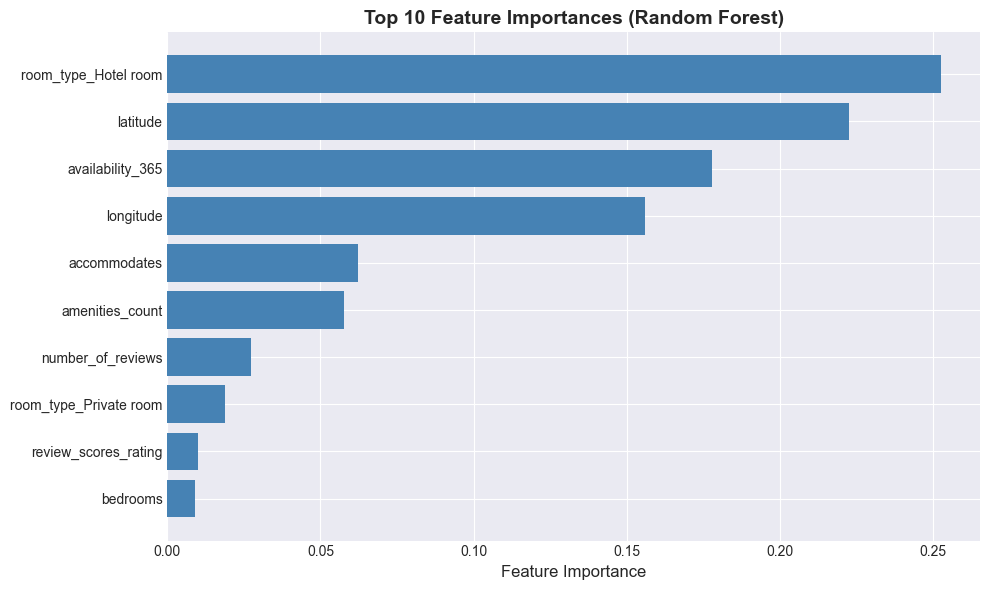


Saved: feature_importance.png


<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Plot comparison of model metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# RMSE comparison
axes[0].bar(results['Model'], results['RMSE'], color='steelblue')
axes[0].set_title('RMSE Comparison', fontweight='bold')
axes[0].set_ylabel('RMSE ($)')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(results['Model'], results['MAE'], color='coral')
axes[1].set_title('MAE Comparison', fontweight='bold')
axes[1].set_ylabel('MAE ($)')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
axes[2].bar(results['Model'], results['R²'], color='mediumseagreen')
axes[2].set_title('R² Comparison', fontweight='bold')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nBest model by metric:")
print(f"  Best RMSE: {results.loc[results['RMSE'].idxmin(), 'Model']} (${results['RMSE'].min():.2f})")
print(f"  Best MAE: {results.loc[results['MAE'].idxmin(), 'Model']} (${results['MAE'].min():.2f})")
print(f"  Best R²: {results.loc[results['R²'].idxmax(), 'Model']} ({results['R²'].max():.3f})")

# Feature Importance Analysis (for Random Forest)
if 'random_forest' in models:
    print("\n" + "=" * 50)
    print("Feature Importance Analysis (Random Forest):")
    print("=" * 50)
    
    rf_model = models['random_forest']
    feature_names = [col for col in df.columns if col != 'price']
    
    # Get feature importances
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Display top 10 features
    print("\nTop 10 Most Important Features:")
    for i in range(min(10, len(indices))):
        idx = indices[i]
        print(f"  {i+1}. {feature_names[idx]}: {importances[idx]:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    top_n = min(10, len(indices))
    top_indices = indices[:top_n]
    plt.barh(range(top_n), importances[top_indices], color='steelblue')
    plt.yticks(range(top_n), [feature_names[i] for i in top_indices])
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    from pathlib import Path
    figures_dir = Path('../output/figures')
    figures_dir.mkdir(parents=True, exist_ok=True)
    plt.savefig(figures_dir / 'feature_importance.png', dpi=300, bbox_inches='tight')
    print(f"\nSaved: feature_importance.png")


## Conclusion + Future Work

### Key Findings:

1. **Data Quality**: The dataset includes comprehensive Airbnb listing information with various features that influence pricing.

2. **Price Patterns**: 
   - Price distribution is right-skewed (many affordable listings, few expensive ones)
   - Location, property size, and room type are key factors
   - Reviews and ratings may influence pricing

3. **Model Performance**: 
   - Advanced models (Random Forest, XGBoost) typically outperform baseline and linear models
   - Feature engineering (amenities count, room type encoding) improves predictive power
   - Geographic features (latitude, longitude) capture location-based pricing

4. **Challenges**:
   - Price prediction is complex due to many factors (location, seasonality, host preferences)
   - Missing data requires careful handling
   - Outliers in price may need special treatment

### Future Work:

- Hyperparameter tuning for advanced models
- Feature selection to identify most important predictors
- Ensemble methods combining multiple models
- Additional feature engineering (neighborhood clusters, distance to landmarks)
- Time-based features if temporal data is available
- Handling of extreme outliers and price caps
